# Assignment 3
Daniel Fylling

In [540]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Task 1
### Estimate value and error variance
### (a)

In [541]:
x_u = np.array([[20, 20]]).T
loc_data = np.array([[0, 80]]).T


In [542]:
dist_DD = np.abs(loc_data - loc_data.T)
dist_DD

array([[ 0, 80],
       [80,  0]])

In [543]:
loc_unknown = 30
dist_UD = np.abs(loc_unknown-loc_data)
dist_UD

array([[30],
       [50]])

In [544]:
mu = 18

In [545]:
def exp_var(h, r, n, s):
    gamma = n + s*(1-np.exp(-3*h/r))
    return gamma

In [546]:
r = 100
n = 0
s = 100

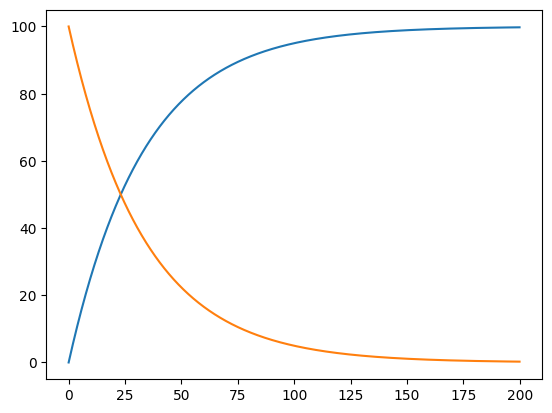

In [547]:
dist_plot = np.arange(0,200,0.1)
var_plot = exp_var(dist_plot, r, n, s)

plt.plot(dist_plot, var_plot)
plt.plot(dist_plot, s - var_plot)

Data covariance from variogram model,  $C_{DD}=sill-(\gamma(h_{DD})-nugget)$

In [548]:
gamma_DD = exp_var(dist_DD, r, n, s)
C_DD = s-(gamma_DD-n)
C_DD

array([[100.        ,   9.07179533],
       [  9.07179533, 100.        ]])

Unknown-to-known data covariance from variogram model, $C_{UD} = sill-(\gamma(h_{UD})-nugget)$

In [549]:
gamma_UD = exp_var(dist_UD, r, n, s)
C_UD = s-(gamma_UD-n)
C_UD

array([[40.65696597],
       [22.31301601]])

$\mathbf{\lambda} = \mathbf{C}_{DD}^{-1} \mathbf{C}_{UD}$

In [550]:
lamb = np.dot(np.linalg.inv(C_DD), C_UD)
lamb

array([[0.38953351],
       [0.18779248]])

$X(u_o)_{SK} =\lambda^{T}(\mathbf{X(u)}-\mu)+\mu$



In [551]:
est = np.dot(lamb.T, (x_u-mu)) + mu
est

array([[19.15465198]])

$\sigma_{SK}^2 =  sill-\mathbf{\lambda}^{T}\mathbf{C}_{UD}$

In [552]:
var = s-np.dot(lamb.T, C_UD)
var

array([[79.97253276]])

### (b)

In [553]:
s = 200

gamma_DD = exp_var(dist_DD, r, n, s)
C_DD = s-(gamma_DD-n)

gamma_UD = exp_var(dist_UD, r, n, s)
C_UD = s-(gamma_UD-n)

lamb = np.dot(np.linalg.inv(C_DD), C_UD)

est = np.dot(lamb.T, (x_u-mu)) + mu
var = s-np.dot(lamb.T, C_UD)
print(est, var)

[[19.15465198]] [[159.94506552]]


As we can see the estimate stays the same and the variance is scaled by the sill.

## Task 3
### (a) Simple Kriging

Note: Showing Task 3 before Task 2 because I solved them in this order, so Task 3 is showing some more formulas that are not shown in 2.

In [554]:
x_u = np.array([3, 4.5, 2]).T
dist_DD = np.array([[0, 2.5, 1.9], [2.5, 0, 2.8], [1.9, 2.8, 0]])
dist_UD = np.array([[1.2, 2, 0.9]]).T
mu = np.mean(x_u)


In [555]:
def sph_var(h, r, n, s):
    gamma = n + s*(1.5*(h/r)-0.5*np.power((h/r),3))
    gamma[h>r] = n + s
    return gamma

In [556]:
r = 10
n = 1.2
s = 6.8

In [557]:
gamma_DD = sph_var(dist_DD, r, n, s)
C_DD = s-(gamma_DD-n)

gamma_UD = sph_var(dist_UD, r, n, s)
C_UD = s-(gamma_UD-n)

lamb = np.dot(np.linalg.inv(C_DD), C_UD)

est = np.dot(lamb.T, (x_u-mu)) + mu
var = s-np.dot(lamb.T, C_UD)
print(est, var)

[2.76370877] [[1.01191529]]


### (b) Ordinary Kriging

$C_{DD,OK} \rightarrow
\begin{bmatrix}
    C_{DD,SK} & \mathbf{1} \\
    \mathbf{1} & 0 
\end{bmatrix}$

In [558]:
n_data = len(x_u)
OK_column = np.array([np.ones(n_data)]).T
C_DD_OK = np.c_[C_DD, OK_column]
OK_row = np.array([np.append(np.ones(n_data),0)])
C_DD_OK = np.r_[C_DD_OK, OK_row]
C_DD_OK

array([[6.8      , 4.303125 , 4.8853206, 1.       ],
       [4.303125 , 6.8      , 4.0186368, 1.       ],
       [4.8853206, 4.0186368, 6.8      , 1.       ],
       [1.       , 1.       , 1.       , 0.       ]])

$\mathbf{C}_{UD,OK} \rightarrow 
\begin{bmatrix}
    \mathbf{C}_{UD,SK} \\
    1 
\end{bmatrix}$

In [559]:
C_UD_OK = np.r_[C_UD,np.array([[1]])]
C_UD_OK

array([[5.5818752],
       [4.7872   ],
       [5.8844786],
       [1.       ]])

$\mathbf{\lambda}_{OK} = \mathbf{C}_{DD,OK}^{-1} \mathbf{C}_{UD,OK}$

In [560]:
lamb_OK = np.dot(np.linalg.inv(C_DD_OK), C_UD_OK)
lamb_OK

array([[0.3196991 ],
       [0.17635466],
       [0.50394625],
       [0.18710623]])

In [561]:
mu_OK = lamb_OK[-1]

$X(u_o)_{OK} =  \lambda^{T}\mathbf{X(u)}$

In [562]:
est_OK = np.dot(lamb_OK[:-1].T, x_u)
est_OK

array([2.76058574])

$\sigma_{OK}^2 =  sill-\mathbf{\lambda}^{T}\mathbf{C}_{UD,SK} - \mu_{OK}$

In [563]:
var_OK = s - np.dot(lamb_OK[:-1].T, C_UD) - mu_OK
var_OK

array([[1.0186674]])

## Task 2
### Ordinary Kriging Problem with Spatial Variations
### (a) Estimate the value of a regionalized variable at point V

In [564]:
x_u = np.array([20, 50, 30, 100]).T
a = np.sqrt(2)*50
b = 100
dist_DD = np.array([[0, a, a, b], [a, 0, b, a], [a, b, 0, a], [b, a, a, 0]])
dist_UD = np.array([[50, 50, 50, 50]]).T
mu = np.mean(x_u)

f = sph_var
r = 200
n = 0
s = 1

In [565]:

def Kriging(x_u, dist_DD, dist_UD, mu, f, r, n, s):  
    gamma_DD = f(dist_DD, r, n, s)
    C_DD = s-(gamma_DD-n)
    gamma_UD = f(dist_UD, r, n, s)
    C_UD = s-(gamma_UD-n)
    lamb = np.dot(np.linalg.inv(C_DD), C_UD)
    est = np.dot(lamb.T, (x_u-mu)) + mu
    var = s-np.dot(lamb.T, C_UD)

    n_data = len(x_u)
    OK_column = np.array([np.ones(n_data)]).T
    C_DD_OK = np.c_[C_DD, OK_column]
    OK_row = np.array([np.append(np.ones(n_data),0)])
    C_DD_OK = np.r_[C_DD_OK, OK_row]

    C_UD_OK = np.r_[C_UD,np.array([[1]])]
    lamb_OK = np.dot(np.linalg.inv(C_DD_OK), C_UD_OK)
    mu_OK = lamb_OK[-1]
    est_OK = np.dot(lamb_OK[:-1].T, x_u)
    var_OK = s - np.dot(lamb_OK[:-1].T, C_UD) - mu_OK
    return lamb_OK, est_OK, var_OK

In [566]:
lamb_OK, est_OK, var_OK = Kriging(x_u, dist_DD, dist_UD, mu, f, r, n, s)
print(f'Weights ={lamb_OK[:-1]}')
print(f'Local mean = {mu}')
print(f'Estimate = {est_OK}')
print(f'Error variance = {var_OK}')

Weights =[[0.25]
 [0.25]
 [0.25]
 [0.25]]
Local mean = 50.0
Estimate = [50.]
Error variance = [[0.3083835]]


### (b) add small nugget effect

In [567]:
n = 0.25
lamb_OK, est_OK, var_OK = Kriging(x_u, dist_DD, dist_UD, mu, f, r, n, s)
print(f'Weights ={lamb_OK[:-1]}')
print(f'Local mean = {mu}')
print(f'Estimate = {est_OK}')
print(f'Error variance = {var_OK}')

Weights =[[0.25]
 [0.25]
 [0.25]
 [0.25]]
Local mean = 50.0
Estimate = [50.]
Error variance = [[0.3083835]]


### (c) Two wells close together

In [568]:
a = np.sqrt(2)*50
b = (25**2 + 100**2)**0.5
c = (50**2 + 100**2)**0.5
d = (25**2 + 50**2)**0.5
dist_DD = np.array([[0, a, a, b], [a, 0, 10, c], [a, 10, 0, c], [b, c, c, 0]])
dist_UD = np.array([[50, 50, 50, d]]).T

n = 0

In [569]:
lamb_OK, est_OK, var_OK = Kriging(x_u, dist_DD, dist_UD, mu, f, r, n, s)
print(f'Weights ={lamb_OK[:-1]}')
print(f'Local mean = {mu}')
print(f'Estimate = {est_OK}')
print(f'Error variance = {var_OK}')

Weights =[[0.29292307]
 [0.17570215]
 [0.17570215]
 [0.35567262]]
Local mean = 50.0
Estimate = [55.48189562]
Error variance = [[0.31979971]]


### (d) Anisotropy

Did not figure out how to do this

### (e) Another configuration

In [570]:
a = np.sqrt(2)*50
d = (25**2 + 50**2)**0.5
dist_DD = np.array([[0, a, 75, 100], [a, 0, d, a], [75, d, 0, 25], [100, a, 25, 0]])
dist_UD = np.array([[50, 50, 25, 50]]).T

In [571]:
lamb_OK, est_OK, var_OK = Kriging(x_u, dist_DD, dist_UD, mu, f, r, n, s)
print(f'Weights ={lamb_OK[:-1]}')
print(f'Local mean = {mu}')
print(f'Estimate = {est_OK}')
print(f'Error variance = {var_OK}')

Weights =[[ 0.27809185]
 [ 0.13467022]
 [ 0.62901399]
 [-0.04177607]]
Local mean = 50.0
Estimate = [26.98816143]
Error variance = [[0.24377693]]


### (f) Comments
- The small nugget effect that was added had no observable effect.
- Not sure what was meant by 2 and 3 being redundant in (c). 
- In (c) we observe that 4 has a high weighting even though it is furthest away from estimation point, which leads to the estimate being higher than the mean.
- In (e) we observe that 4 receives a (small, but) negative weighting, which is probably due to it being "hidden" behind 3.


## Task 4
### Variogram fitting

In [572]:
x_u = np.array([11, 12, 15, 17, 16, 19, 17])
loc_data = np.array([0, 10, 20, 30, 40, 50, 60])

$C(h)= \frac{1}{N_h} \sum\limits_{i=1}^{N_h}x_ix_{i+h} - \bar{x_i}\bar{x_{i+h}}$

In [573]:
n_l = len(x_u)-1
E_var = np.zeros(n_l)

for l in range(1, n_l + 1):
    Nh = len(x_u) - l
    E_var[l-1] = (1/(2*Nh))*np.sum(np.power((x_u[l:] - x_u[:-l]), 2)) 

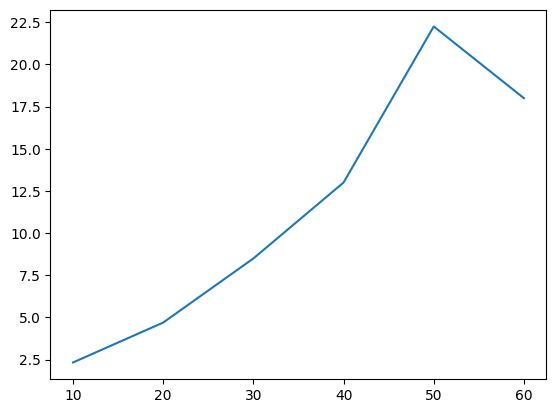

In [574]:
plt.plot(loc_data[1:], E_var)

Values for p0 taken from visual inspection of above graph.

In [575]:
sph_params,_ = curve_fit(sph_var, loc_data[1:], E_var, p0=[50,0,20])
sph_params

array([77.61521397, -4.11293496, 26.05626909])

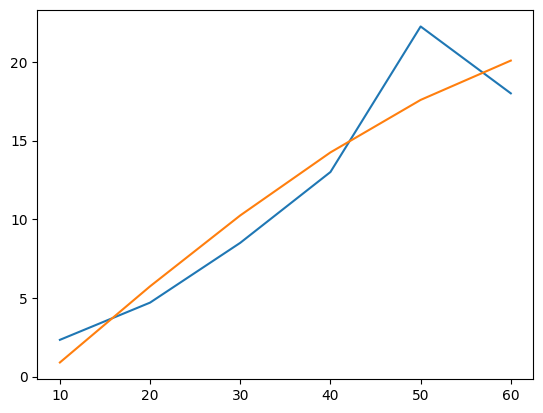

In [576]:
r, n, s = sph_params
Sph_var = sph_var(loc_data[1:], r, n, s)
plt.plot(loc_data[1:], E_var)
plt.plot(loc_data[1:], Sph_var)

In [577]:
exp_params,_ = curve_fit(exp_var, loc_data[1:], E_var, p0=[50,0,20])
exp_params

array([385.86471408,  -3.59846874,  65.06361688])

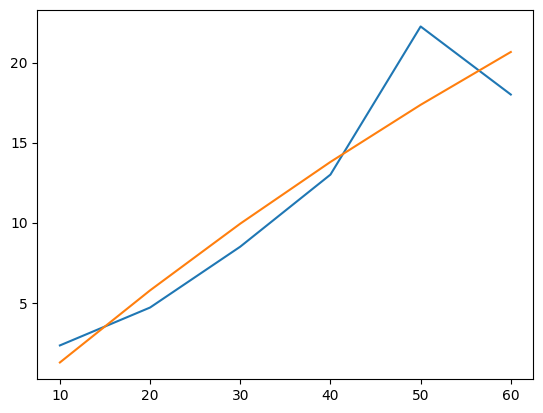

In [578]:
r, n, s = exp_params
Exp_var = exp_var(loc_data[1:], r, n, s)
plt.plot(loc_data[1:], E_var)
plt.plot(loc_data[1:], Exp_var)

In [579]:
def gauss_var(h, r, n, s):
    gamma = n + s*(1-np.exp(-3*np.power(h/r, 2)))
    return gamma

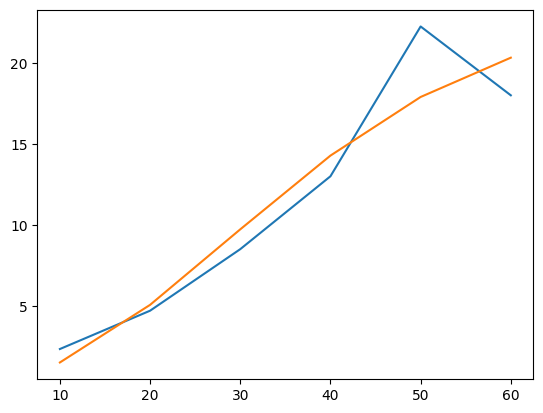

In [580]:
gauss_params,_ = curve_fit(gauss_var, loc_data[1:], E_var, p0=[50,0,20])
gauss_params
r, n, s = gauss_params
Gauss_var = gauss_var(loc_data[1:], r, n, s)
plt.plot(loc_data[1:], E_var)
plt.plot(loc_data[1:], Gauss_var)

Finding solution for x = 15

In [581]:
x_u = np.array([[11, 12, 15, 17, 16, 19, 17]]).T
loc_data = np.array([[0, 10, 20, 30, 40, 50, 60]]).T

In [582]:
dist_DD = np.abs(loc_data[:3] - loc_data[:3].T)
dist_DD

array([[ 0, 10, 20],
       [10,  0, 10],
       [20, 10,  0]])

In [583]:
loc_unknown = 15
dist_UD = np.abs(loc_unknown-loc_data[:3])
dist_UD

array([[15],
       [ 5],
       [ 5]])

In [584]:
# Still using mean for full data set
mu = np.mean(x_u)
mu

15.285714285714286

In [585]:
r, n, s = exp_params

In [586]:
gamma_DD = exp_var(dist_DD, r, n, s)
C_DD = s-(gamma_DD-n)

gamma_UD = exp_var(dist_UD, r, n, s)
C_UD = s-(gamma_UD-n)

lamb = np.dot(np.linalg.inv(C_DD), C_UD)

est = np.dot(lamb.T, (x_u[:3]-mu)) + mu
var = s-np.dot(lamb.T, C_UD)
print(est, var)

[[13.50134841]] [[2.52799208]]


Finding solution for x = 25

In [587]:
dist_DD = np.abs(loc_data[1:4] - loc_data[1:4].T)

loc_unknown = 25
dist_UD = np.abs(loc_unknown-loc_data[1:4])

r, n, s = exp_params

gamma_DD = exp_var(dist_DD, r, n, s)
C_DD = s-(gamma_DD-n)

gamma_UD = exp_var(dist_UD, r, n, s)
C_UD = s-(gamma_UD-n)

lamb = np.dot(np.linalg.inv(C_DD), C_UD)

est = np.dot(lamb.T, (x_u[1:4]-mu)) + mu
var = s-np.dot(lamb.T, C_UD)
print(est, var)

[[15.99946064]] [[2.52799208]]
